# Investigate IMDB Dataset 
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#DataCleaning">Data Cleaning & Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<ul>
<li>In this analysis we will know an important informations about movies and movies production companies from the IMDB dataset and answer some questions.</li>

<li>1-Is there a relation between the rates and years? And What is it lead to?</li>

<li>2-What is the most rate is given to the movies? And What is it?</li>

<li>3-Is there any relation between movie production and years? And What is it lead to?</li>

<li>4-Is there any relation between the revenue and the years? And What is it lead to?</li>

<li>5-Is the movie production companies spend more budgets over the years? And What is it lead to?</li>

<li>6-What are the top 5 movies made a profit? And What is the highest one?</li>

<li>7-What is the highest genre?</li>

<li>8-What are the top 10 Directors by rate? And What is the highest one?</li>

<li>9-What are Top 10 directors by Total revenue for the movies they directed?</li>

<li>10-What are Top 10 directors by Avrage revenue for the movies they directed?</li>
</ul>

### For the analysis included in the notebook we will take look at all the abouve questions.

In [61]:
# Importing libraries and open the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

imdb_pd = pd.read_csv("imdb-movies.csv")

# Assissing DataFrame and Data Wrangling

In [62]:
imdb_pd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
imdb_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [64]:
imdb_pd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [65]:
imdb_pd.vote_average.value_counts()

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: vote_average, Length: 72, dtype: int64

In [66]:
imdb_pd.genres.value_counts()

Drama                                              712
Comedy                                             712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
                                                  ... 
Science Fiction|Action|Adventure|Fantasy|Comedy      1
Adventure|Drama|Fantasy|Romance|Science Fiction      1
Crime|History                                        1
Romance|Science Fiction                              1
Adventure|Family|Foreign                             1
Name: genres, Length: 2039, dtype: int64

<a id='DataCleaning'></a>
# Data Cleaning

In [67]:
# There are some data need to be cleane.
# 1- Drop unnecessary for the analysis.
# 2- Drop the null values.
# 3- Drop the duplicated

imdb = imdb_pd.copy()

In [68]:
#Drop the unused columns(id and imdb_id)
imdb.drop(["id","imdb_id", "cast", "homepage", "tagline", "overview", "release_date", "keywords","production_companies"], axis=1, inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [69]:
#Drop null rows
imdb.dropna(inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
 10  budget_adj      10801 non-null  float64
 11  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [70]:
sum(imdb.duplicated())

1

In [71]:
# drop duplicates
imdb.drop_duplicates(inplace=True)

In [72]:
# confirm correction by rechecking for duplicates in the data
sum(imdb.duplicated())

0

## Reaccessing after this clean.

In [73]:
imdb["director"].value_counts()

Woody Allen                                     45
Clint Eastwood                                  34
Martin Scorsese                                 29
Steven Spielberg                                29
Ridley Scott                                    23
                                                ..
Brett Donowho                                    1
Alex Winter|Tom Stern                            1
Jim Wheat|Ken Wheat                              1
Thomas Bangalter|Guy-Manuel de Homem-Christo     1
Robert Hiltzik                                   1
Name: director, Length: 5056, dtype: int64

In [74]:
imdb["runtime"].max()

900

In [75]:
imdb.nlargest(10,'runtime')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,0.0,0.000000e+00
4041,0.469332,0,0,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,38,6.8,2002,0.0,0.000000e+00
2722,0.537593,0,125000000,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,313,8.0,2001,0.0,1.539360e+08
6176,0.147489,0,0,Shoah,Claude Lanzmann,566,Documentary,16,8.3,1985,0.0,0.000000e+00
6894,0.137913,0,0,Planet Earth,Alastair Fothergill,550,Documentary,65,7.6,2006,0.0,0.000000e+00
2214,0.757082,120000000,0,The Pacific,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,183,7.8,2010,120000000.0,0.000000e+00
3356,0.136540,0,0,John Adams,Tom Hooper,501,History|Drama,33,6.6,2008,0.0,0.000000e+00
1865,0.102223,0,0,Life,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,24,7.0,2009,0.0,0.000000e+00
3141,0.336308,0,0,Generation Kill,Susanna White|Simon Cellan Jones,470,Drama|War|History,28,6.6,2008,0.0,0.000000e+00
2170,0.082894,0,0,The Pillars of the Earth,Sergio Mimica-Gezzan,421,Drama|History|Romance,22,7.3,2010,0.0,0.000000e+00


In [76]:
imdb.nlargest(10,'vote_average')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,0.0,0.0
538,0.114264,0,0,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015,0.0,0.0
1200,0.129531,0,0,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,0.0,0.0
2269,0.222293,0,0,Life Cycles,Derek Frankowski,47,Documentary,27,8.8,2010,0.0,0.0
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,23,8.7,2006,0.0,0.0
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure|Documentary,60,8.5,2011,0.0,0.0
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,11,8.5,1995,0.0,0.0
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,14,8.5,1981,0.0,0.0
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Stan Lathan,57,Comedy,17,8.5,2000,0.0,0.0
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,Documentary,72,8.4,2015,0.0,0.0


In [77]:
imdb['budget_adj'] = imdb['budget_adj'].replace(0,np.nan)
imdb['revenue_adj'] = imdb['revenue_adj'].replace(0,np.nan)

In [78]:
imdb['revenue_adj'].tail(10)

10856   NaN
10857   NaN
10858   NaN
10859   NaN
10860   NaN
10861   NaN
10862   NaN
10863   NaN
10864   NaN
10865   NaN
Name: revenue_adj, dtype: float64

In [79]:
imdb['budget_adj'].tail(10)

10856              NaN
10857              NaN
10858              NaN
10859              NaN
10860              NaN
10861              NaN
10862              NaN
10863              NaN
10864              NaN
10865    127642.279154
Name: budget_adj, dtype: float64

In [80]:
budgetAdj_mean = imdb['budget_adj'].mean()
imdb['budget_adj'].fillna(budgetAdj_mean , inplace=True)

In [81]:
imdb['budget_adj'].tail(10)

10856    3.692239e+07
10857    3.692239e+07
10858    3.692239e+07
10859    3.692239e+07
10860    3.692239e+07
10861    3.692239e+07
10862    3.692239e+07
10863    3.692239e+07
10864    3.692239e+07
10865    1.276423e+05
Name: budget_adj, dtype: float64

In [82]:
revenueAdj_mean = imdb['revenue_adj'].mean()
imdb['revenue_adj'].fillna(revenueAdj_mean , inplace=True)

In [83]:
imdb['revenue_adj'].tail(10)

10856    1.151223e+08
10857    1.151223e+08
10858    1.151223e+08
10859    1.151223e+08
10860    1.151223e+08
10861    1.151223e+08
10862    1.151223e+08
10863    1.151223e+08
10864    1.151223e+08
10865    1.151223e+08
Name: revenue_adj, dtype: float64

In [84]:
imdb.nlargest(20,'vote_average')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011,3.692239e+07,1.151223e+08
538,0.114264,0,0,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015,3.692239e+07,1.151223e+08
1200,0.129531,0,0,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,3.692239e+07,1.151223e+08
2269,0.222293,0,0,Life Cycles,Derek Frankowski,47,Documentary,27,8.8,2010,3.692239e+07,1.151223e+08
6911,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,23,8.7,2006,3.692239e+07,1.151223e+08
3690,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure|Documentary,60,8.5,2011,3.692239e+07,1.151223e+08
8221,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,11,8.5,1995,3.692239e+07,1.151223e+08
8411,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,14,8.5,1981,3.692239e+07,1.151223e+08
8839,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Stan Lathan,57,Comedy,17,8.5,2000,3.692239e+07,1.151223e+08
609,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,Documentary,72,8.4,2015,3.692239e+07,1.151223e+08


<a id='eda'></a>
## Exploratory Data Analysis

> Explore the data visually to know what we will work on it and ask the questions.


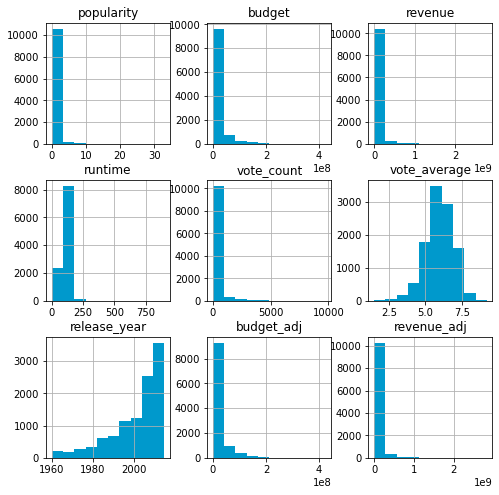

In [85]:
imdb.hist(figsize=(8,8),color='#0099CC');

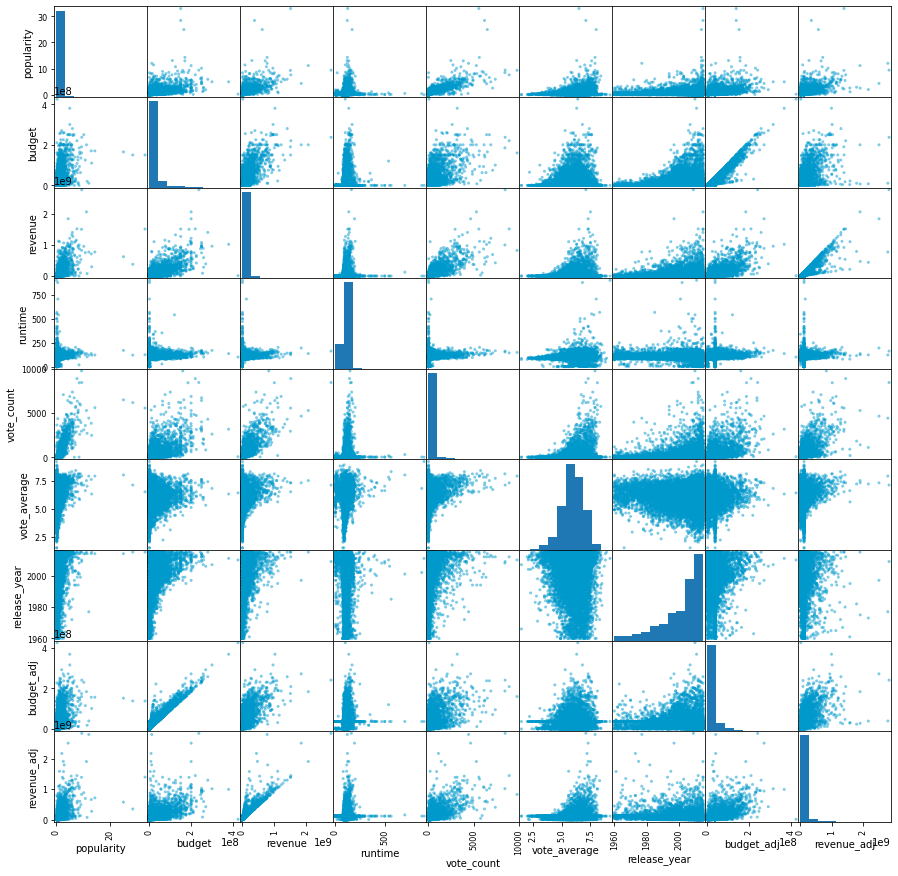

In [86]:
pd.plotting.scatter_matrix(imdb,figsize=(15,15),color='#0099CC');

# Research Question 1 (Is there a relation between the rates and years?)
#### This question will determine is there any relation between the rates and years and the relationship strength and answer the question: Is lately the rates increased?.

#### We chose a scatter plot because the 2 variables is quantitative and to measure the distribution between the release years and average rating to know if there is a relationship or not and the strength of it.

#### The next scatter plot shows that over the years and increasing the number of movies more low rates came out and slightly a small number of higher rates.

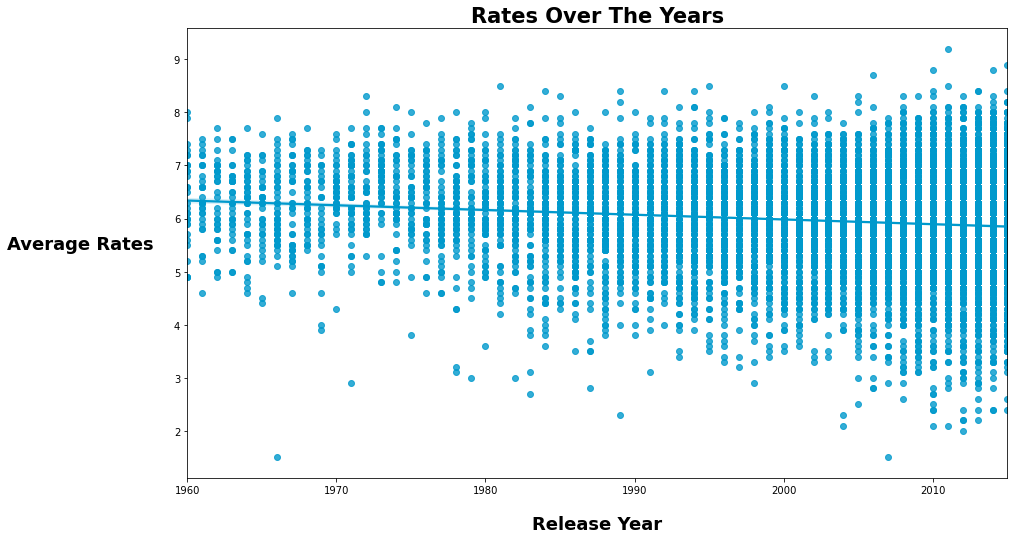

In [87]:
plt.figure(figsize=[14.70, 8.27])
sb.regplot(data = imdb,x="release_year", y="vote_average",color='#0099CC')
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Average Rates",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Rates Over The Years",fontsize=21, weight='bold');

#### We can determine that the relationship is strong in low rates because it highly decreased over the years but it is a medium relation in high rates because it slightly grows not too much.

# Research Question 2 (What is the most rate is given to the movies?)

#### We want to know the most rate the people give to the movies.

#### The next histogram shows that most highest movie rates are between 5 to 7 approximately.

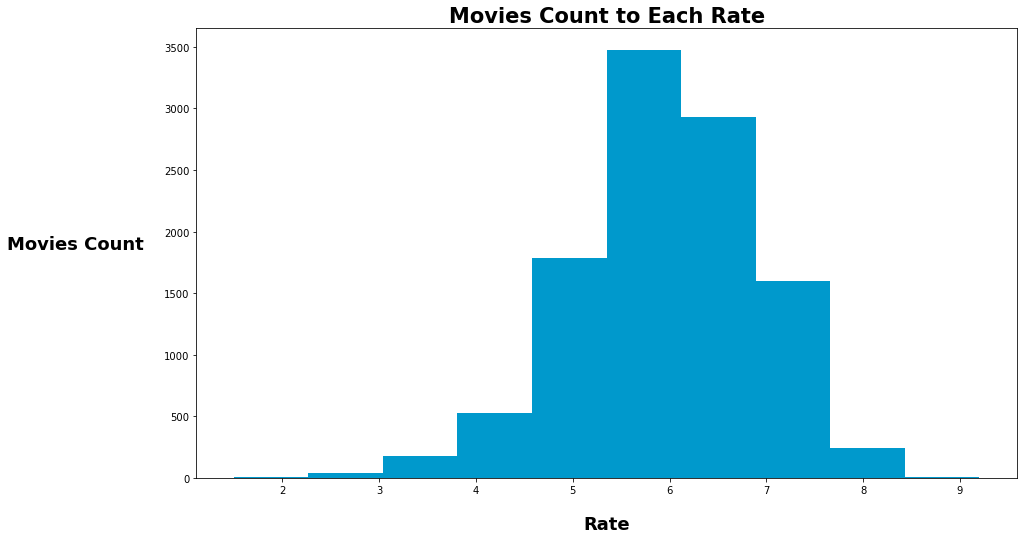

In [88]:
plt.figure(figsize=[14.70, 8.27])
imdb["vote_average"].hist(color='#0099CC');
plt.xlabel("Rate",fontsize=18, labelpad=20, weight='bold');
plt.grid(alpha=0)
plt.ylabel("Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Movies Count to Each Rate",fontsize=21, weight='bold');

### The last shape show us the range of the rating most gived to movies is between 5.3 and 6.1 and thats is the list of the most rates gived to the movies 
<ul>
<li>6.1    :    496 rate</li>

<li>6.0    :    495 rate</li>

<li>5.8    :    486 rate</li>

<li>5.9    :    473 rate</li>

<li>6.2    :    464 rate</li>

<li>6.3    :    461 rate</li>

<li>6.5    :    457 rate</li>

<li>6.4    :    446 rate</li>

<li>5.7    :    415 rate</li>

<li>6.6    :    413 rate</li>

<li>5.6    :    412 rate</li>
</ul>

#### It's between 5.6 and 6.1 and the variance not too big.
#### The highest one is 6.1/10

# Research Question 3 (Is there any relation between movies production and years ?)

#### We need to know if the movies produced lately more than in the past or not?

#### The next histogram shows that movies production slowly grew between 1960/1994, and highly Increased between 1994/2017 approximately.

#### We choose histogram because it is simple and enough for our question to know if there any increase or decrease in movies over the years.

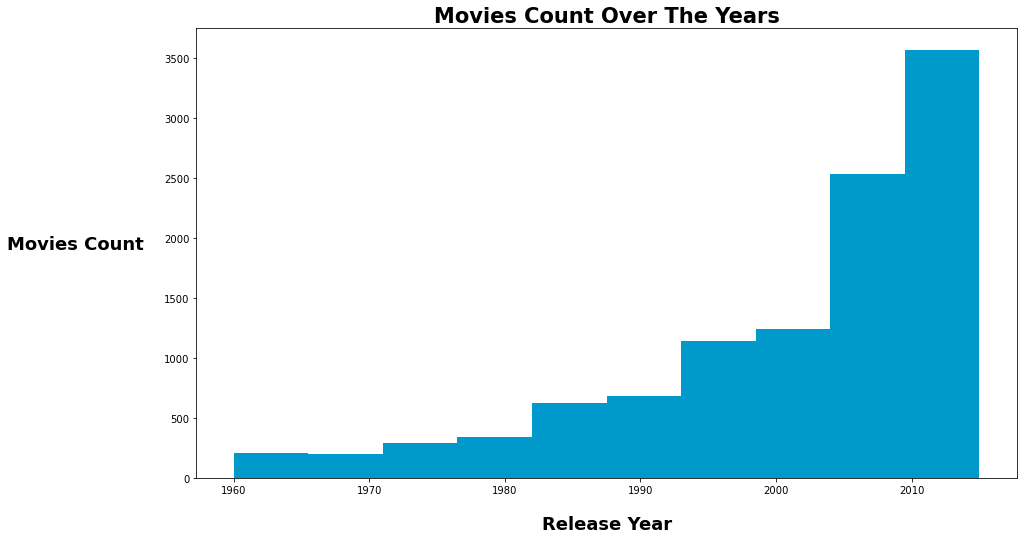

In [89]:
plt.figure(figsize=[14.70, 8.27])
imdb["release_year"].hist(color='#0099CC');
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold');
plt.grid(alpha=0)
plt.ylabel("Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Movies Count Over The Years",fontsize=21, weight='bold');

#### We can determine that the movie count is increasing and highly increase lately in the 20th century.

# Research Question 4 (Is there any relation between the revenue and the years?)

#### We will use the scatter plot to know if there is relation between the revenue and the years to detrimne if lately the movies make more profit or not. 

#### the next scatter plot shows us that the movie profits is slightly increased over the years

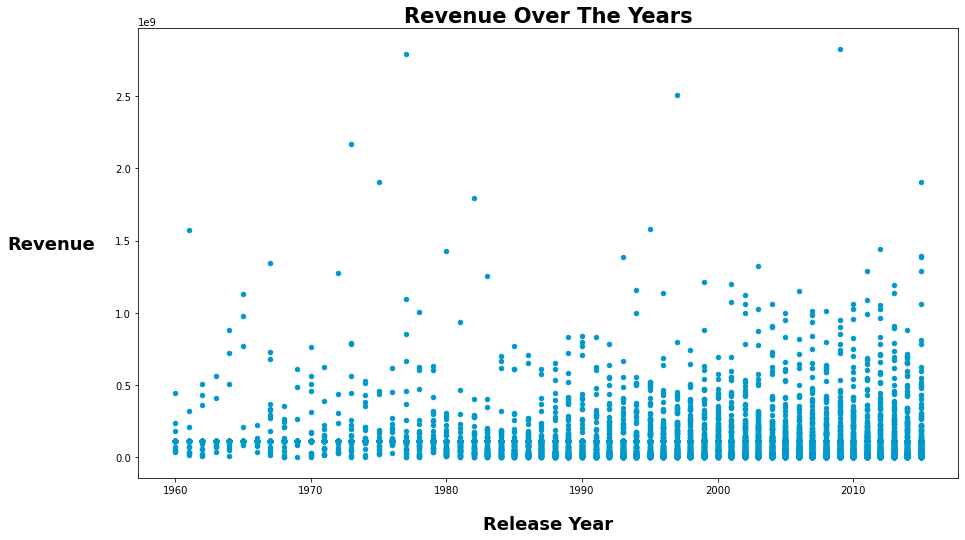

In [90]:
imdb.plot(x="release_year", y="revenue_adj",kind="scatter",figsize=[14.70, 8.27],color='#0099CC');
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Revenue",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Revenue Over The Years",fontsize=21, weight='bold');

#### We can determine that lately the movies make a slightly higher profit, considering the huge number of movies lately.

# Research Question 5 (Is the movie production companies spend more budgets over the years?)

#### We will use scatter plot to know if the production companies spend more budgets on movies lately or not.

#### the next scatter plot shows us that the production companies spend a higher budget for movies produce over the years.

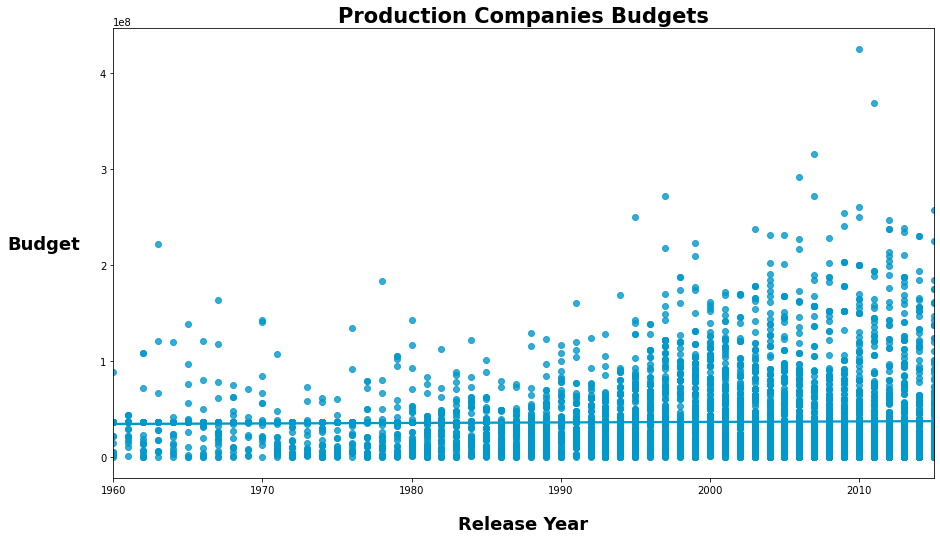

In [91]:
plt.figure(figsize=[14.70, 8.27])
sb.regplot(data = imdb,x="release_year", y="budget_adj",color='#0099CC');
plt.xlabel("Release Year",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Budget",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Production Companies Budgets",fontsize=21, weight='bold');

#### We can determine that the production companies spend a higher budget for movies produce lately.

In [92]:
highest_revenue = imdb[["original_title", "revenue_adj"]]

In [93]:
highest_revenue.nlargest(5, "revenue_adj", keep='last')

,original_title,revenue_adj
1386,Avatar,2.827124e+09
1329,Star Wars,2.789712e+09
5231,Titanic,2.506406e+09
10594,The Exorcist,2.167325e+09
9806,Jaws,1.907006e+09


In [94]:
highest5movies_revenue = highest_revenue.nlargest(5, "revenue_adj", keep='last')

# Research Question 6 (What are the top 5 movies made a profit?)

#### We will use bar chart to shows the top 5 movies made a profit.

#### The next shape shows the top 5 movies made a profit.

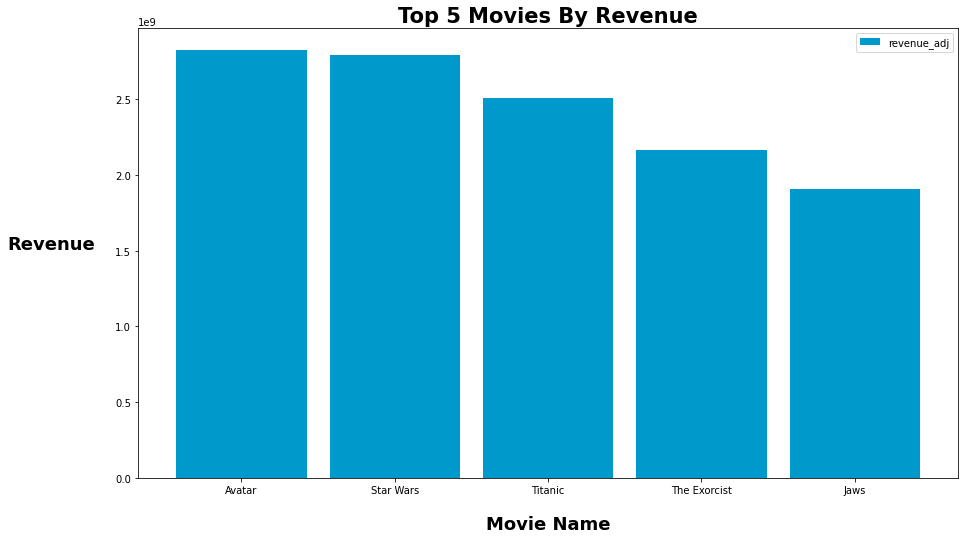

In [95]:
highest5movies_revenue.plot(x="original_title", y="revenue_adj",kind="bar",figsize=[14.70, 8.27],color='#0099CC', zorder=2, width=0.85);
plt.xlabel("Movie Name",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Revenue",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.xticks(rotation=0)
plt.title("Top 5 Movies By Revenue",fontsize=21, weight='bold');

#### We can determine the top 5 movies making a profit and the highest movie made a profit was Avatar.

In [96]:
imdb["genres"].replace("|"," | ",inplace=True)

In [97]:
imdb["genres"].value_counts()

Drama                                              711
Comedy                                             707
Documentary                                        306
Drama|Romance                                      289
Comedy|Drama                                       280
                                                  ... 
Science Fiction|Action|Adventure|Fantasy|Comedy      1
Adventure|Drama|Fantasy|Romance|Science Fiction      1
Crime|History                                        1
Romance|Science Fiction                              1
Adventure|Family|Foreign                             1
Name: genres, Length: 2031, dtype: int64

In [98]:
true = (imdb["genres"].str.contains("\|"))==True

In [99]:
Action = imdb[imdb['genres'].str.contains('Action')].count()

In [100]:
Action['genres'].sum()

2378

In [101]:
War = imdb[imdb['genres'].str.contains('War')].count()
Comedy = imdb[imdb['genres'].str.contains('Comedy')].count()
Science = imdb[imdb['genres'].str.contains('Science')].count()
Thriller = imdb[imdb['genres'].str.contains('Thriller')].count()
Drama = imdb[imdb['genres'].str.contains('Drama')].count()
Horror = imdb[imdb['genres'].str.contains('Horror')].count()
Western = imdb[imdb['genres'].str.contains('Western')].count()
Romance = imdb[imdb['genres'].str.contains('Romance')].count()
Family = imdb[imdb['genres'].str.contains('Family')].count()
Crime = imdb[imdb['genres'].str.contains('Crime')].count()
ScienceFiction = imdb[imdb['genres'].str.contains('Science Fiction')].count()
Fantasy = imdb[imdb['genres'].str.contains('Fantasy')].count()
History = imdb[imdb['genres'].str.contains('History')].count()
Foreign = imdb[imdb['genres'].str.contains('Foreign')].count()
Adventure = imdb[imdb['genres'].str.contains('Adventure')].count()
Action = imdb[imdb['genres'].str.contains('Action')].count()
Documentary = imdb[imdb['genres'].str.contains('Documentary')].count()

In [102]:
data = {'Genre':['Comedy', 'War', 'Science', 'Thriller', 'Drama', 'Horror', 'Western', 'Family', 'Romance', 'Crime',
                 'ScienceFiction', 'Fantasy','History','Foreign','Adventure','Action','Documentary'],
        'Count':[Comedy['genres'].sum(),War['genres'].sum(),Science['genres'].sum(), Thriller['genres'].sum(),
                 Drama['genres'].sum(),Horror['genres'].sum(),Western['genres'].sum(),Family['genres'].sum(),
                 Romance['genres'].sum(),Crime['genres'].sum(),ScienceFiction['genres'].sum(),Fantasy['genres'].sum(),
                 History['genres'].sum(),Foreign['genres'].sum(),Adventure['genres'].sum(),Action['genres'].sum(),
                 Documentary['genres'].sum()]}   
df = pd.DataFrame(data)  
df.sort_values(by=['Count'], ascending=False,inplace=True)

# Research Question 7 (What is the highest genre?)

#### We will use a bar chart to determine the highest genre used in the movies.

#### The next shape shows movie count associated to each genre.

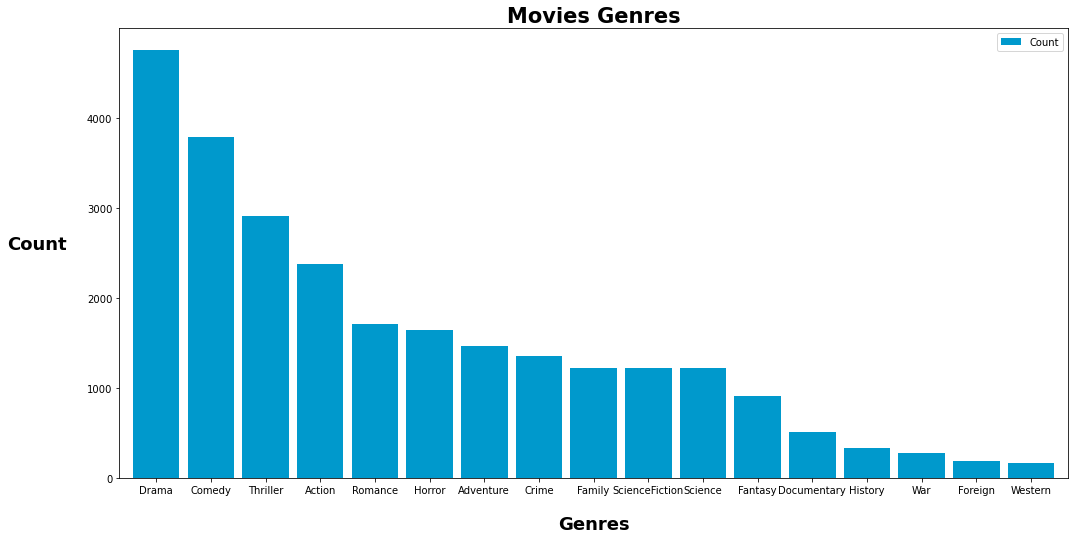

In [103]:
df.plot(x="Genre", y="Count",kind='bar', figsize=[17, 8.27],color='#0099CC', zorder=2, width=0.85)

plt.xlabel("Genres",fontsize=18, labelpad=20, weight='bold')
plt.ylabel("Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold')
plt.title("Movies Genres",fontsize=21, weight='bold')
plt.xticks(rotation=0)
locs, labels = plt.xticks()
plt.xticks(locs, df["Genre"]);

#### After this shape, we can determine that the Drama has the most movies produced over the years and the minimum is the Western genre.

## Research Question 8 (What are the top 10 Directors by rate?)

#### We will use bar chart to determine the top 10 directors take a rate to know the best directors.

#### The next shape shows The top 10 Directors associated by their movies rating.

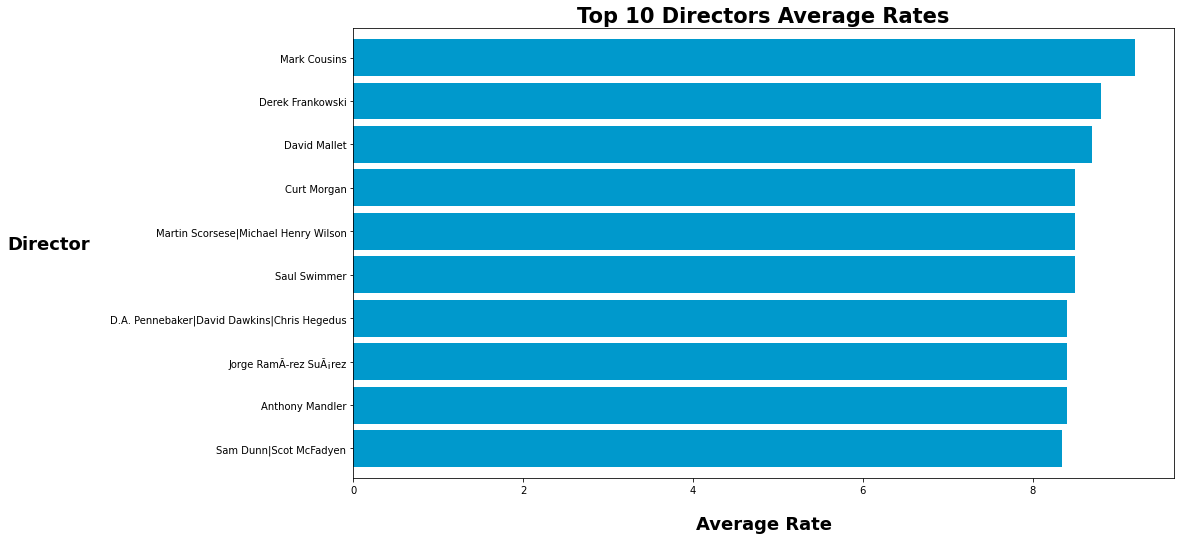

In [104]:
io = imdb.groupby(['director'])["vote_average"].mean().sort_values().tail(10)
io.plot(x="director",kind="barh",figsize=[14.70, 8.27],color='#0099CC', zorder=2, width=0.85);

plt.xlabel("Average Rate",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Director",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Top 10 Directors Average Rates",fontsize=21, weight='bold');

#### After looking at the director's shape we will determine that mark cousins is the best director based on the rates he gained.

## Research Question 9 (What are Top 10 directors by total revenue for the movies they directed?)

In [105]:
imdb.groupby(['director'])["revenue_adj"].sum().sort_values(ascending=False).head(10)

director
Steven Spielberg    1.543269e+10
James Cameron       7.442343e+09
Peter Jackson       7.250092e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.885893e+09
Michael Bay         5.460672e+09
Chris Columbus      5.324322e+09
Ron Howard          4.987585e+09
Tim Burton          4.874652e+09
Clint Eastwood      4.580668e+09
Name: revenue_adj, dtype: float64

In [137]:
locs = ['Steven Spielberg','James Cameron','Peter Jackson','George Lucas','Robert Zemeckis',              
        'Michael Bay','Chris Columbus','Ron Howard','Tim Burton','Clint Eastwood'] 

top10rev = imdb.loc[imdb['director'].isin(locs)]
top10rev_counts = top10rev['director'].value_counts()
top10rev_counts


Clint Eastwood      34
Steven Spielberg    29
Ron Howard          22
Tim Burton          19
Robert Zemeckis     17
Chris Columbus      14
Peter Jackson       13
Michael Bay         11
James Cameron        9
George Lucas         6
Name: director, dtype: int64

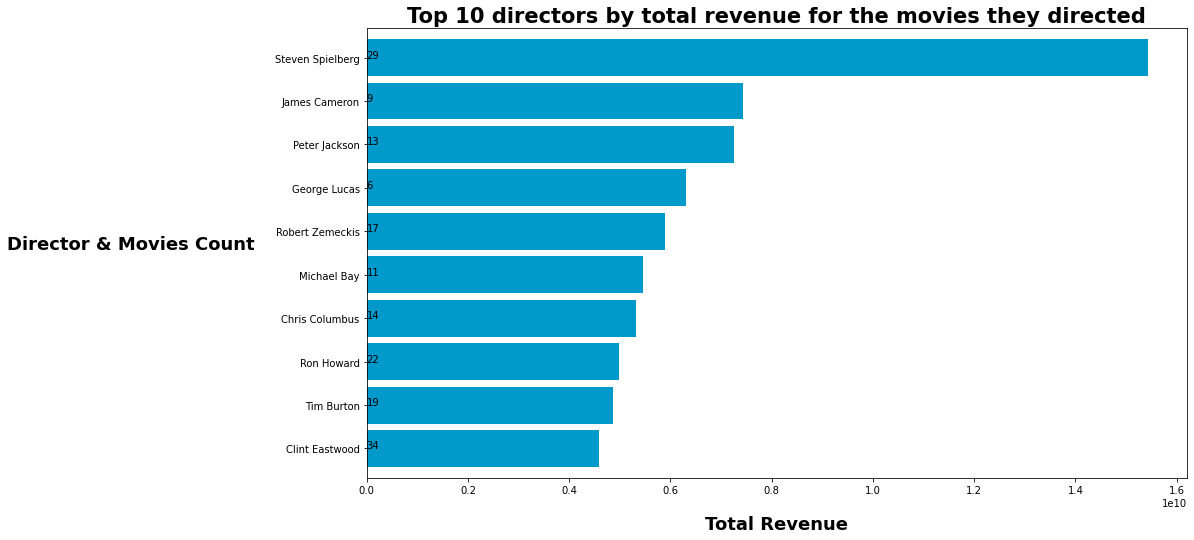

In [138]:
plt.figure(figsize=[14.70, 8.27])
y = [34,19,22,14,11,17,6,13,9,29]

oi = imdb.groupby(['director'])["revenue_adj"].sum().sort_values()
oi.tail(10).plot(x="director",kind="barh",color='#0099CC', zorder=2, width=0.85);  

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel("Total Revenue",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Director & Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Top 10 directors by total revenue for the movies they directed",fontsize=21, weight='bold');

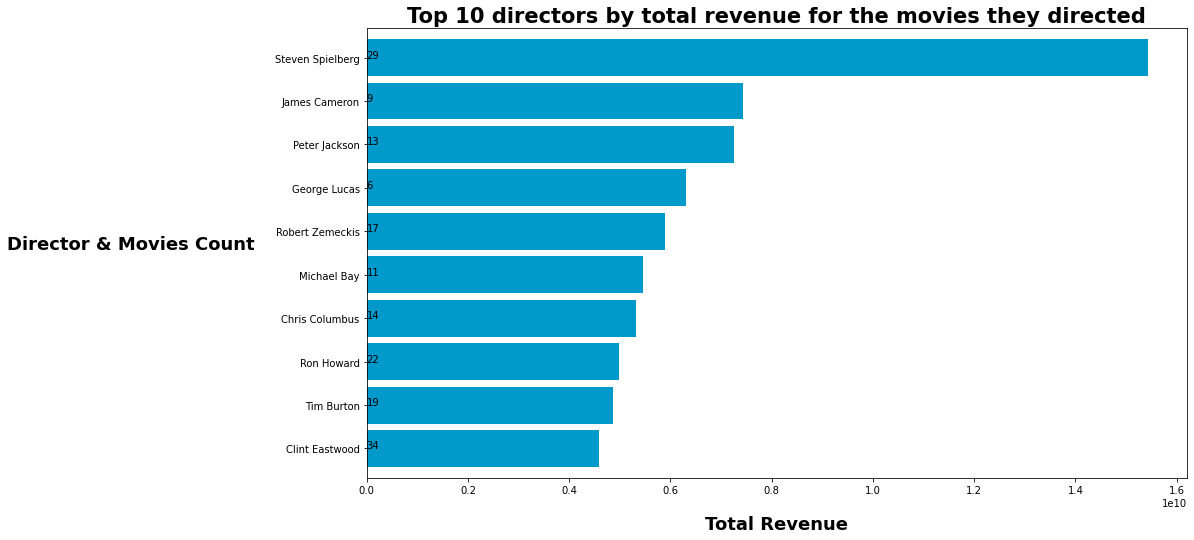

In [139]:
plt.figure(figsize=[14.70, 8.27])
y = [34,19,22,14,11,17,6,13,9,29]

oi = imdb.groupby(['director'])["revenue_adj"].sum().sort_values().tail(10)
oi.plot(x="director",kind="barh",color='#0099CC', zorder=2, width=0.85);  

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel("Total Revenue",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Director & Movies Count",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Top 10 directors by total revenue for the movies they directed",fontsize=21, weight='bold');

#### We can see the total revenue for the top 10 directors for the movies they directed and we can notice that there is some of them have a huge number of movies but a low amount of revenue so in the next visual we will show the top 10 directors but by the average revenue for their movies to determine the top 10 successful directors in making a profit for their movies.

### Research Question 10 (What are Top 10 directors by Avrage revenue for the movies they directed?)

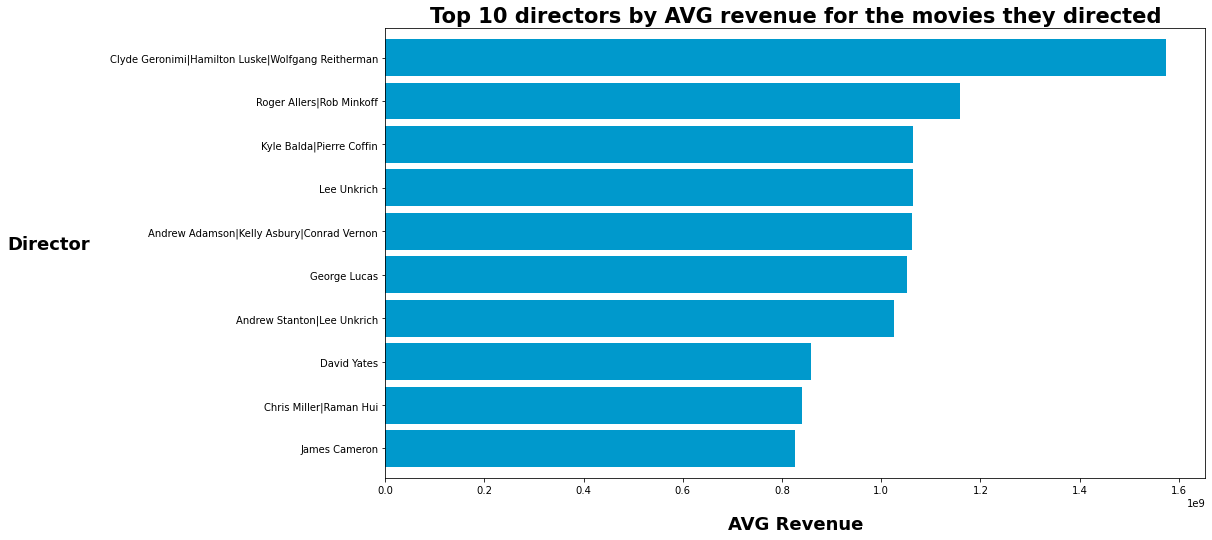

In [133]:
plt.figure(figsize=[14.70, 8.27])

oi = imdb.groupby(['director'])["revenue_adj"].mean().sort_values().tail(10)
oi.plot(x="director",kind="barh",color='#0099CC', zorder=2, width=0.85);  

plt.xlabel("AVG Revenue",fontsize=18, labelpad=20, weight='bold');
plt.ylabel("Director",fontsize=18,rotation=0,ha="right", labelpad=20, weight='bold');
plt.title("Top 10 directors by AVG revenue for the movies they directed",fontsize=21, weight='bold');

#### We now can determine the top 10 successful directors in making a profit for their movies.

<a id='conclusions'></a>
## Conclusions

### Results: Our data leads us to:
> We answered some important questions that provided us a valuable information about movies.

> We determined that over the years and increasing the number of movies more low rates came 
out and slightly a small number of higher rates. 

> We figured out that the most highest movie rates are between 5/10 to 7/10 approximately and the highest rate givin to the movies is 6.1/10.

> We determined that the movies production slowly grew between 1960-1994, and highly Increased between 1994-2017 approximately.

> We determined that the movie profits is slightly increased over the years.

> We determined that the production companies spend a higher budget for movies produce over the years.

> We figured out the top 5 movies made a profit and the highest one is "Avatar".

> We figured out that the highest movie genre ever made is the comedy.

> We figured out the top 10 directors by rates and the highest one is Mark Cousins.

> The Highest movie rate is for The Story of Film: An Odyssey by 9.2/10 and it have only 14 rates and it is missleading to the top movie so the movie after this movie has 8.4 rate and not a little amount of rates by 5754 is The Shawshank Redemption for the director Frank Darabont.

> Woody Allen has the highest number of movies directed by 45 movie.

> In the last 2 visuals, we can determine the top successfully 10 directors made a profit for the movies they directed.

> The average revenue for all movies is higher than the average budget by 35 million dollars approximately, so we can determine that movie production is a profitable field.

> The average runtime for the movies is 1.7 hours.

> We have also strange information that there are movies that have a 900 minutes runtime!

## limitations: There are a couple of limitations faced our analysis:
<ol>
<li> Most of our data is categorical which limits us to make correlations between factors</li>
<li> There are a lot of null values, misleading data, and outliers, which these samples are not an effective representation of the population.</li>
</ol>

###### I used Stack Overflow ,GeeksforGeeks ,Seaborn documentation ,Data to Fish and pandas documentation.

In [49]:
!jupyter nbconvert Investigate_a_Dataset.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to pdf
[NbConvertApp] Support files will be in Investigate_a_Dataset_files\
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Making directory .\Investigate_a_Dataset_files
[NbConvertApp] Writing 68641 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  F